In [1]:
# load and clean-up data
#from numpy import nan
#from numpy import isnan
#from pandas import read_csv
#from pandas import to_numeric


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from math import sqrt
from numpy import split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras_tuner import RandomSearch
from keras_tuner import Hyperband
from keras_tuner import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [2]:
datos = pd.read_csv("data-room-10T-all.csv", sep = ";", index_col=0)

In [3]:
datos

,room,block,dif_cons,cons_total,V2,V12,V4,V26,V5_0,V5_1,...,dvmed,prec,dewpt,Hora_1,Hora_2,Hora_3,Season_1,Season_2,Season_3,Season_4
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:10:00+00:00,B1.1.010,A,0.23,1.55,20.0,21.0,0.0,0.0,1.0,0.0,...,180.7,0.0,-2.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-01-01 00:10:00+00:00,B1.3.010,A,0.23,1.55,21.1,24.0,0.0,0.0,1.0,0.0,...,180.7,0.0,-2.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-01-01 00:10:00+00:00,B1.1.008,A,0.23,1.55,19.9,21.0,0.0,0.0,1.0,0.0,...,180.7,0.0,-2.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-01-01 00:10:00+00:00,B1.1.024,A,0.23,1.55,24.3,24.0,0.0,0.0,1.0,0.0,...,180.7,0.0,-2.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-01-01 00:10:00+00:00,B1.4.007,A,0.23,1.55,23.2,25.0,0.0,0.0,1.0,0.0,...,180.7,0.0,-2.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17 23:50:00+00:00,B1.1.017,B,0.52,22403.96,22.7,24.5,0.0,0.0,1.0,0.0,...,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2021-12-17 23:50:00+00:00,B1.2.016,B,0.52,22403.96,22.3,25.0,0.0,0.0,1.0,0.0,...,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2021-12-17 23:50:00+00:00,B1.0.026,C,0.09,41624.85,24.0,23.5,0.0,0.0,1.0,0.0,...,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
#def season(Mes):
#    if Mes in range(1,4): return 1
#    if Mes in range(4,7): return 2
#    if Mes in range(7,10): return 3
#    if Mes in range(10,13): return 4

In [23]:
#datos['Season'] = pd.to_datetime(datos.index, utc = True).month
#datos['Season'] = datos['Season'].apply(season).astype(int)
#datos = pd.concat([datos, pd.get_dummies(datos['Season'], prefix='Season')], axis=1).drop(columns=['Season'])

In [3]:
def find_events(data, edificios, n_obs_antes, n_obs_despues):
    #DataFrame vacío para la salida
    datos_all_rooms = pd.DataFrame()
    
    #Para que no haya problemas de slice y .loc
    pd.options.mode.chained_assignment = None
    
    #Cogemos los datos, y seleccionamos las habitaciones de cada edificio 
    datos = data
    edificio = edificios
    mask = datos['block'].isin(edificio)
    datos = datos.loc[mask]
    rooms = datos['room'].unique()
    
    #Iteramos sobre cada una de las habitaciones
    for room in rooms:
        mask = datos['room'].isin([room])
        datos_room = datos.loc[mask]
        datos_room = datos_room.drop(columns=['dif_cons','cons_total','block','room', 'V12','V26','V5_0','V5_1','V5_2'],axis=1)
        
        #Ponemos la columna de V4 como string y buscamos una secuencia de un 1 seguido de n 0's
        #El número de 0's lo establece n_obs_despues
        text = datos_room.V4.fillna(2).astype(int).astype(str).str.cat()
        time = n_obs_despues*10 #Esto nos da el tiempo en min. Ej: n_obs_despues = 6 -> time = 60'

        sequence = list(np.repeat(str(0),time/10))
        sequence.insert(0,'1')
        sequence= ''.join(sequence)
        pattern = f'(?:{sequence})'
        findings = re.finditer(pattern, text)
        events = [(m.start(0)) for m in findings]  

        #n_obs_antes = 1
        #n_obs_despues = 6

        df = pd.DataFrame()
        #Para cada una de las secuencias de 1 y 0's, hacemos la selección de las instancias correspondientes
        #del conjunto de datos y las añadimos a un df, que iremos completando con cada uno de los eventos
        for i in range(len(events)):
            ref_inicio = events[i]+1 #+1 porque la referencia de inicio es el primer 0 y events empieza en el 1
            df1 = datos_room.iloc[range(ref_inicio - n_obs_antes, ref_inicio + n_obs_despues),:]
            data = df1
            #Una vez que tenemos los eventos quitamos la columna de V4
            data = data.drop(columns='V4')
            #n_vars = 1 if type(data) is list else data.shape[1]
            df = pd.concat([df,data])
        datos_all_rooms = pd.concat([datos_all_rooms, df])
    return datos_all_rooms

In [4]:
edificio = ['A','B','C']
n_obs_antes = 1
n_obs_despues = 6
datos_all_rooms = find_events(datos, edificio, n_obs_antes, n_obs_despues)

In [5]:
datos_all_rooms.describe()

,V2,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt,Hora_1,Hora_2,Hora_3,Season_1,Season_2,Season_3,Season_4
count,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.00000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,28.099167,24.644586,44.169263,448.717201,1.384569,154.894523,0.006352,10.324073,0.586422,0.40025,0.013328,0.093294,0.160350,0.500000,0.246356
std,2.581853,7.880144,17.254872,305.852882,0.748199,102.806833,0.092340,5.854642,0.492526,0.49000,0.114686,0.290875,0.366968,0.500052,0.430933
min,15.800000,5.200000,4.200000,0.000000,0.000000,0.000000,0.000000,-9.600000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.400000,18.100000,32.000000,168.500000,0.800000,62.200000,0.000000,6.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.400000,26.400000,41.300000,453.200000,1.400000,137.800000,0.000000,11.500000,1.000000,0.00000,0.000000,0.000000,0.000000,0.500000,0.000000
75%,30.100000,30.600000,53.900000,710.025000,1.900000,240.500000,0.000000,15.100000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.100000,44.000000,89.700000,1172.000000,4.400000,359.800000,4.600000,21.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
datos_all_rooms.iloc[0:14]

,V2,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt,Hora_1,Hora_2,Hora_3,Season_1,Season_2,Season_3,Season_4
Fecha,,,,,,,,,,,,,,,
2021-09-30 09:10:00+00:00,29.0,23.0,69.0,184.8,0.4,5.6,0.0,17.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 09:20:00+00:00,28.5,23.2,68.3,241.3,0.6,8.6,0.0,17.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 09:30:00+00:00,28.3,23.4,67.8,375.6,0.4,8.8,0.0,17.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 09:40:00+00:00,28.5,24.2,64.7,381.2,0.3,17.1,0.0,17.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 09:50:00+00:00,28.7,24.1,64.5,226.0,0.3,193.5,0.0,17.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 10:00:00+00:00,28.9,24.4,64.3,487.8,0.4,210.9,0.0,17.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-09-30 10:10:00+00:00,28.9,24.9,61.8,613.5,0.7,303.7,0.0,17.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-07-12 08:10:00+00:00,32.7,30.4,52.2,386.7,0.6,340.5,0.0,19.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-07-12 08:20:00+00:00,31.6,30.7,51.1,411.4,0.3,296.2,0.0,19.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
def feature_selection(num_features, datos):
    data = datos
    select = SelectKBest(score_func=f_regression, k=num_features)
    z = select.fit_transform(data.iloc[:,1:], data.iloc[:,0]) 
    filter = select.get_support()
    features = np.array(data.iloc[:,1:].columns.values)
    features = features[filter].tolist()
    features.insert(0, 'V2')
    return features

In [7]:
features = feature_selection(10, datos_all_rooms)
datos_all_rooms = datos_all_rooms.loc[:,features]
print("Selected:")
print(features)

Selected:
['V2', 'tmed', 'hrmed', 'radmed', 'vvmed', 'dvmed', 'dewpt', 'Hora_2', 'Season_1', 'Season_3', 'Season_4']


In [8]:
df = datos_all_rooms
print(df.shape)
df.head(2)

(4802, 11)


,V2,tmed,hrmed,radmed,vvmed,dvmed,dewpt,Hora_2,Season_1,Season_3,Season_4
Fecha,,,,,,,,,,,
2021-09-30 09:10:00+00:00,29.0,23.0,69.0,184.8,0.4,5.6,17.0,0.0,0.0,1.0,0.0
2021-09-30 09:20:00+00:00,28.5,23.2,68.3,241.3,0.6,8.6,17.1,0.0,0.0,1.0,0.0


In [52]:
df

,V2,tmed,hrmed,radmed,vvmed,dvmed,dewpt,Hora_2,Season_1,Season_3,Season_4
Fecha,,,,,,,,,,,
2021-09-30 09:10:00+00:00,29.0,23.0,69.0,184.8,0.4,5.6,17.0,0.0,0.0,1.0,0.0
2021-09-30 09:20:00+00:00,28.5,23.2,68.3,241.3,0.6,8.6,17.1,0.0,0.0,1.0,0.0
2021-09-30 09:30:00+00:00,28.3,23.4,67.8,375.6,0.4,8.8,17.2,0.0,0.0,1.0,0.0
2021-09-30 09:40:00+00:00,28.5,24.2,64.7,381.2,0.3,17.1,17.2,0.0,0.0,1.0,0.0
2021-09-30 09:50:00+00:00,28.7,24.1,64.5,226.0,0.3,193.5,17.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26 11:20:00+00:00,25.0,14.0,40.1,537.0,1.3,320.6,0.7,0.0,0.0,0.0,1.0
2021-11-26 11:30:00+00:00,25.0,14.2,39.3,544.6,1.3,307.6,0.5,0.0,0.0,0.0,1.0
2021-11-26 11:40:00+00:00,25.0,14.3,38.3,551.9,1.7,289.3,0.3,0.0,0.0,0.0,1.0


In [9]:
#Hacemos el shuffle del df manualmente, de forma que cada grupo de 7 eventos siga junto, pero el orden de los grupos cambie
#para que así los conjuntos de train y test tengan ejemplos no consecutivos y de cada uno de los edificios
#Esto lo haría en un paso pero no va (?)
#np.random.shuffle(df.values.reshape(-1,7,df.shape[1]))
def shuffle_df(datos, interval):
    arr_3D = df.values.reshape(-1,interval,df.shape[1])
    shuffle_idx = np.random.permutation(arr_3D.shape[0])
    shuffle_idx
    arr_3D = arr_3D[shuffle_idx]
    shuffled_df = pd.DataFrame(arr_3D.reshape(df.shape[0],df.shape[1]))
    return shuffled_df

In [10]:
np.random.seed(123)
interval = n_obs_antes + n_obs_despues
df = shuffle_df(df, interval)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,23.5,19.1,36.9,585.1,1.7,96.6,4.0,1.0,1.0,0.0,0.0
1,22.8,18.9,38.6,558.0,2.3,89.0,4.5,1.0,1.0,0.0,0.0
2,22.9,18.8,42.1,522.5,1.7,90.0,5.6,1.0,1.0,0.0,0.0
3,24.7,18.6,41.9,494.8,2.0,69.7,5.4,1.0,1.0,0.0,0.0
4,25.1,18.5,42.5,460.4,2.0,67.2,5.6,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4797,29.2,34.5,31.1,932.0,2.1,24.2,15.0,0.0,0.0,1.0,0.0
4798,29.1,34.8,28.4,926.0,1.6,0.2,13.8,0.0,0.0,1.0,0.0
4799,29.5,35.5,23.6,932.0,1.9,77.5,11.6,0.0,0.0,1.0,0.0
4800,29.5,35.7,24.4,926.0,1.5,120.2,12.3,0.0,0.0,1.0,0.0


In [170]:
#df.to_csv('data-modelo-temp'+'.csv', sep=";", index= False)
#df = pd.read_csv('data-modelo-temp'+'.csv', sep=";")

In [17]:
def split_dataset(data, per_train, interval):
    # split 
    # df.shape[0]/interval es el número de eventos que hay en total, 686 para interval = 7.
    # de eso nos quedamos con el 70% y para evitar inconsistencias usamos el ceil
    # después multiplicamos por interval porque cada evento tiene ese número de entradas
    train, test = data[0:int((interval*np.ceil(df.shape[0]/interval*per_train)))], data[int((interval*np.ceil(df.shape[0]/interval*per_train))):]
    #Escalado en train y test por separado. Si no se hace aquí ya no se puede porque todo lo que sigue es con arrays 3D
    scaler_y = StandardScaler()
    train_y = scaler_y.fit_transform(train[:,0].reshape(-1, 1))
    test_y = scaler_y.transform(test[:,0].reshape(-1, 1))
    #test_y = test[:,0]
    scaler_x = RobustScaler()
    #train_x = scaler_x.fit_transform(train[:,[1,2,3,4,5,6]])
    #test_x = scaler_x.transform(test[:,[1,2,3,4,5,6]])
    train_x = scaler_x.fit_transform(train[:,1:])
    test_x = scaler_x.transform(test[:,1:])
    
    train = pd.concat([pd.DataFrame(train_y),pd.DataFrame(train_x)], axis=1) #pd.DataFrame(train).drop(columns = [0,1,2,3,4,5,6])
    test = pd.concat([pd.DataFrame(test_y),pd.DataFrame(test_x)], axis=1)
    
    # restructure into windows of <interval> samples
    train = np.array(split(train, len(train)/(n_obs_antes+n_obs_despues)))
    test = np.array(split(test, len(test)/(n_obs_antes+n_obs_despues)))
    return train, test, scaler_x, scaler_y

In [12]:
#Sin escalado
#De momento funciona mejor así
def split_dataset(data, per_train, interval):
    # split 
    # df.shape[0]/interval es el número de eventos que hay en total, 686 para interval = 7.
    # de eso nos quedamos con el 70% y para evitar inconsistencias usamos el ceil
    # después multiplicamos por interval porque cada evento tiene ese número de entradas
    train, test = data[0:int((interval*np.ceil(df.shape[0]/interval*per_train)))], data[int((interval*np.ceil(df.shape[0]/interval*per_train))):]
    
    # restructure into windows of <interval> samples
    train = np.array(split(train, len(train)/(n_obs_antes+n_obs_despues)))
    test = np.array(split(test, len(test)/(n_obs_antes+n_obs_despues)))
    return train, test

In [13]:
# split into train and test
per_train = 0.7
train, test = split_dataset(df.values, per_train, interval)

In [206]:
train.shape

(481, 7, 11)

In [21]:
train

array([[[23.5, 19.1, 36.9, ...,  1. ,  0. ,  0. ],
        [22.8, 18.9, 38.6, ...,  1. ,  0. ,  0. ],
        [22.9, 18.8, 42.1, ...,  1. ,  0. ,  0. ],
        ...,
        [25.1, 18.5, 42.5, ...,  1. ,  0. ,  0. ],
        [25.4, 18.2, 43.3, ...,  1. ,  0. ,  0. ],
        [25.4, 17.9, 44.6, ...,  1. ,  0. ,  0. ]],

       [[26.4, 18.1, 42.5, ...,  0. ,  0. ,  1. ],
        [26.4, 18.2, 42.3, ...,  0. ,  0. ,  1. ],
        [26.4, 18.3, 41.9, ...,  0. ,  0. ,  1. ],
        ...,
        [26.3, 18.4, 42.1, ...,  0. ,  0. ,  1. ],
        [26.2, 18.5, 41.7, ...,  0. ,  0. ,  1. ],
        [26.1, 18.5, 42.5, ...,  0. ,  0. ,  1. ]],

       [[30. , 30.7, 43.3, ...,  0. ,  1. ,  0. ],
        [28.6, 31.6, 41.2, ...,  0. ,  1. ,  0. ],
        [29.8, 31.2, 42.1, ...,  0. ,  1. ,  0. ],
        ...,
        [29.6, 31.1, 42.3, ...,  0. ,  1. ,  0. ],
        [30.4, 31.1, 42.4, ...,  0. ,  1. ,  0. ],
        [30.6, 31.3, 42.1, ...,  0. ,  1. ,  0. ]],

       ...,

       [[28.1, 30.8, 40.

In [61]:
test.shape

(205, 7, 11)

In [ ]:
#Train/Test tiene shape (481/205, 7, 11):
# - 481/205 es el número de muestras
# - 7 son los pasos de tiempo de cada muestra
# - 11 es el número de características

In [207]:
(train.shape[0]*train.shape[1], train.shape[2])

(3367, 11)

In [14]:
#convert history into inputs and outputs
def to_supervised(train, n_input, n_out):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2])) #(3367, 11)
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    X = array(X)
    y = array(y)
    #for i in range(train.shape[0]):
    #    if i in range(0,train.shape[0],7): 
    #        X[i,0] = y[i-1]
    return X, y

In [15]:
n_input = n_obs_antes
n_out = 1

In [93]:
train_x, train_y = to_supervised(train, n_input, n_out)

In [94]:
test_x, test_y = to_supervised(test, n_input, n_out)

In [ ]:
a = pd.concat([pd.DataFrame(test_y),pd.DataFrame(test_x.reshape(test_x.shape[0],test_x.shape[2]*n_obs_antes))], axis=1).iloc[0:40]

In [ ]:
a = pd.concat([pd.DataFrame(train_y),pd.DataFrame(train_x.reshape(train_x.shape[0],train_x.shape[2]*n_obs_antes))], axis=1).iloc[0:40]

In [ ]:
#Antes de corregir
a.iloc[:,[0,1,12,23,2,13,24]]
# Solo queremos predecir las 6 primeras filas de cada 9 (en el caso n_obs_antes=3, n_obs_despues=6)

In [ ]:
#Despues de corregir
a.iloc[:,[0,1,12,23,2,13,24]]
#Una vez que nos hemos quedado con los indices que interesan, esto es lo que vemos

In [ ]:
rows_to_keep = n_obs_despues #+ n_obs_antes-1
rows_to_drop = n_obs_antes
period = rows_to_keep + rows_to_drop

In [ ]:
np.arange(len(test_x)) % period

In [ ]:
s = (np.arange(len(train_x)) % period) < rows_to_keep
ss = (np.arange(len(test_x)) % period) < rows_to_keep

In [ ]:
train_x = train_x[s,:,:]
train_y = train_y[s,:] 

test_x = test_x[ss,:,:]
test_y = test_y[ss,:] 

In [ ]:
print('train_x shape:' , train_x.shape) 
print('train_y shape:'  , train_y.shape)     
print('test_x shape:' , test_x.shape)  
print('test_y shape:' , test_y.shape)   

In [63]:
train_x

array([[[23.5, 19.1, 36.9, ...,  1. ,  0. ,  0. ]],

       [[22.8, 18.9, 38.6, ...,  1. ,  0. ,  0. ]],

       [[22.9, 18.8, 42.1, ...,  1. ,  0. ,  0. ]],

       ...,

       [[27. , 12.6, 86.5, ...,  0. ,  0. ,  1. ]],

       [[27.2, 12.8, 86.8, ...,  0. ,  0. ,  1. ]],

       [[27.2, 12.8, 86.9, ...,  0. ,  0. ,  1. ]]])

In [64]:
train_y

array([[22.8],
       [22.9],
       [24.7],
       ...,
       [27.2],
       [27.2],
       [27.1]])

In [21]:
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]

In [22]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(50)))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mae', optimizer='adam')
# fit network
#stop_early = keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=5)
history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x, test_y),
                    verbose=2, shuffle=False)

Epoch 1/100
46/46 - 4s - loss: 19.0397 - val_loss: 5.2030 - 4s/epoch - 93ms/step
Epoch 2/100
46/46 - 0s - loss: 2.6224 - val_loss: 1.9641 - 257ms/epoch - 6ms/step
Epoch 3/100
46/46 - 0s - loss: 1.8162 - val_loss: 1.8294 - 253ms/epoch - 6ms/step
Epoch 4/100
46/46 - 0s - loss: 1.7122 - val_loss: 1.7341 - 252ms/epoch - 5ms/step
Epoch 5/100
46/46 - 0s - loss: 1.6487 - val_loss: 1.6143 - 256ms/epoch - 6ms/step
Epoch 6/100
46/46 - 0s - loss: 1.5886 - val_loss: 1.5220 - 255ms/epoch - 6ms/step
Epoch 7/100
46/46 - 0s - loss: 1.5068 - val_loss: 1.4844 - 257ms/epoch - 6ms/step
Epoch 8/100
46/46 - 0s - loss: 1.4305 - val_loss: 1.4673 - 257ms/epoch - 6ms/step
Epoch 9/100
46/46 - 0s - loss: 1.4222 - val_loss: 1.4109 - 257ms/epoch - 6ms/step
Epoch 10/100
46/46 - 0s - loss: 1.3798 - val_loss: 1.4497 - 255ms/epoch - 6ms/step
Epoch 11/100
46/46 - 0s - loss: 1.3873 - val_loss: 1.3823 - 259ms/epoch - 6ms/step
Epoch 12/100
46/46 - 0s - loss: 1.3322 - val_loss: 1.4176 - 258ms/epoch - 6ms/step
Epoch 13/100
4

Epoch 100/100
46/46 - 0s - loss: 0.9917 - val_loss: 1.1769 - 250ms/epoch - 5ms/step


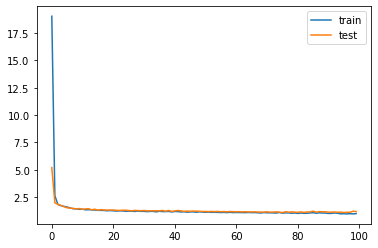

In [23]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [106]:
train_x.shape

(2886, 1, 11)

In [99]:
n_outputs

1

In [229]:
def build_model(hp):
    model = Sequential()
    #Numero de nodos en la primera capa 
    hp_units = hp.Int('input_unit',min_value=32,max_value=96,step=32)
    model.add(LSTM(units = hp_units, input_shape=(n_timesteps, n_features)))
    model.add(RepeatVector(n_outputs))   
    #Numero de capas ocultas
    for i in range(hp.Int('n_layers', 1, 2)):
        units_i = hp.Int(f'dense_{i}_units',min_value=32,max_value=96,step=32)
        model.add(LSTM(units = hp_units, return_sequences=True))
    #Dropout
    hp_dropout = hp.Float('Dropout_rate',min_value=0,max_value=0.4,step=0.1)
    model.add(Dropout(hp_dropout))
    model.add(TimeDistributed(Dense(units = hp_units)))
    
    model.add(TimeDistributed(Dense(n_outputs)))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(loss='mae', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

model.compile(loss='mae', optimizer='adam')

In [230]:
tuner= BayesianOptimization(
        build_model,
        objective='val_loss',
        max_trials=10,
        num_initial_points=2,
        seed = 123,
        overwrite=True
        )

In [231]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [232]:
#Si esto da un error que dice algo de Oracle, se arregla borrando los json que hay en /untitle_project
tuner.search(
        x=train_x,
        y=train_y,
        epochs=100,
        batch_size=128,
        validation_data=(test_x,test_y),
        verbose=2,
        shuffle=False,
        callbacks=[stop_early]
)

Trial 10 Complete [00h 00m 41s]
val_loss: 0.24803359806537628

Best val_loss So Far: 0.24790005385875702
Total elapsed time: 00h 04m 07s
INFO:tensorflow:Oracle triggered exit


In [233]:
model = tuner.get_best_models(num_models=1)[0]

In [234]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 96)                40320     
                                                                 
 repeat_vector (RepeatVector  (None, 1, 96)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 96)             74112     
                                                                 
 lstm_2 (LSTM)               (None, 1, 96)             74112     
                                                                 
 dropout (Dropout)           (None, 1, 96)             0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 96)            9312      
 ibuted)                                                

In [143]:
def forecast(model, history, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    #[-n:, :] coge las primeras n filas, con todas las columnas
    input_x = data[-n_input:, :]
    # reshape into [1, n_input, 1]
    #input_x = input_x.reshape((1, len(input_x), 1))
    input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

In [144]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score

In [154]:
# evaluate a single model
def evaluate_model(train, test, n_input, modelo):
    # fit model
    #model = build_model(train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    #score = evaluate_forecasts(test[:, :, 0], predictions)
    test_y = test[:,1:,0]
    #predictions = predictions.reshape(test_y.shape[0], test_y.shape[1])
    return predictions, test_y

In [155]:
predictions, test_y = evaluate_model(train, test, n_input, model)

In [147]:
test_y.shape

(1230, 1)

In [155]:
test_y[0,:]

array([25.4])

In [151]:
for i in range(0,50,n_obs_despues):
    print(i)

0
6
12
18
24
30
36
42
48


In [68]:
history = [x for x in test_x]

In [69]:
data = np.array(history)
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

In [70]:
data

array([[23.5, 19.4, 36.5, ...,  0. ,  0. ,  1. ],
       [25.4, 19.2, 37.7, ...,  0. ,  0. ,  1. ],
       [25.5, 19. , 38.8, ...,  0. ,  0. ,  1. ],
       ...,
       [29.1, 34.8, 28.4, ...,  0. ,  1. ,  0. ],
       [29.5, 35.5, 23.6, ...,  0. ,  1. ,  0. ],
       [29.5, 35.7, 24.4, ...,  0. ,  1. ,  0. ]])

In [43]:
test_x.reshape(test_x.shape[0]*test_x.shape[1], test_x.shape[2])[0,:]

array([ 23.5,  19.4,  36.5, 164.1,   1.2, 265.7,   4.1,   1. ,   0. ,
         0. ,   1. ])

In [117]:
test_x[1:3,:]

array([[[ 25.4,  19.2,  37.7, 168.2,   1.4, 257.6,   4.4,   1. ,   0. ,
           0. ,   1. ]],

       [[ 25.5,  19. ,  38.8, 154.6,   1.8, 256.2,   4.6,   1. ,   0. ,
           0. ,   1. ]]])

In [113]:
test_x[16,0,]

29.4

In [121]:
data = test_x[15:17,:,:]
# retrieve last observations for input data
input_x = data[:, :]
input_x

array([[[ 29.1,  29.9,  36.4, 814. ,   2.3,  65.4,  13.5,   1. ,   0. ,
           1. ,   0. ]],

       [[ 29.4,  29.9,  37.3, 794.8,   2.5,  60.3,  13.7,   1. ,   0. ,
           1. ,   0. ]]])

In [122]:
model.predict(input_x, verbose=0)

array([[[30.03121 ]],

       [[30.033556]]], dtype=float32)

In [ ]:
n_predict = 6
n = n_obs_despues - n_predict 
m = n_predict   #Salto de n cada m
test_index = [j for i in range(0,len(test_x), n+m) for j in range(i, m+i) if j<len(test_x)]
#len(test_index) debe ser igual a test.shape[0]*n_predict, si no, algo está mal
len(test_index)==test.shape[0]*n_predict

In [86]:
#Creamos un history que lleve todas las entradas del conjunto test_x
#history = [x for x in test_x]
#Creamos una lista vacía para las predicciones
predictions = list()
i=0
#---------
n_predict = 9
n = n_obs_despues - n_predict 
m = n_predict   #Salto de n cada m
test_index = [j for i in range(0,len(test_x), n+m) for j in range(i, m+i) if j<len(test_x)]
#-----------
#for i in range(len(test_x)):
for i in test_index:
    data = test_x[i,:,:]
    #print(data)
    # Cogemos como input los valores del instante de tiempo anterior al que vamos a predecir
    # Recordar que el x lleva un lag de 1 respecto a la y, por eso es el elemento i y no el i-1
    #input_x = data[:, :]
    #print(input_x.shape)
    #input_x = input_x.reshape((1, 1, input_x.shape[2]))
    input_x = data.reshape((1, n_timesteps, n_features))
    # Prediccion para cada paso de tiempo
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast

    yhat_sequence = yhat[0]
    
    #if i in range(0,test_x.shape[0],interval): #(0,1434,7)
    #     yhat_sequence = np.asarray([[test_y[i,0]]], dtype=np.float32)
        
    # store the predictions
    predictions.append(yhat_sequence)
    
    # Reescribimos el valor de la temperatura del siguiente paso con la prediccion
    #Hay que cambiar la posicion que se actualiza si de input tenemos más de 1 time step
    if i < len(test_x):
        try: test_x[i+1,n_input,0] = yhat[0]
        except IndexError: continue
        #test_x[i+n_input,:,0] = yhat[0] (?)
    else: break

    #else
    #    if i < len(test_x)-1: test_x[i+1,:,0] = yhat[0]
    #    else: break
    #test_x[i+1,:,0]
            
    #history.append(test_x[i+1,:,:])
# evaluate predictions days for each week
predictions = array(predictions)

In [ ]:
prediction = predictions

In [ ]:
test_y = test_y[test_index,:]

In [ ]:
test_y.shape

In [ ]:
prediction.shape

In [ ]:
#Poner el tamaño de todos los reshapes y slices en función de parámetros
#predictions = scaler_y.inverse_transform(predictions.reshape(1434,1))
#test_y = scaler_y.inverse_transform(test_y)

In [ ]:
pred_shape_1

In [ ]:
test.shape

In [ ]:
#pred_shape_0 = int(np.floor(test_y.shape[0]/(n_obs_despues+n_obs_antes)))
pred_shape_0 = test.shape[0]
pred_shape_1 = n_predict #+n_obs_antes-1
limit = test_y.shape[0]-n_obs_despues#n_obs_antes

In [ ]:
#prediction = prediction[:limit].reshape(pred_shape_0, pred_shape_1)
prediction = prediction.reshape(pred_shape_0, pred_shape_1)

#test_y = test_y[:limit].reshape(pred_shape_0, pred_shape_1)
test_y = test_y.reshape(pred_shape_0, pred_shape_1)

In [100]:
print(prediction.shape)
print(test_y.shape)

(205, 6)
(205, 6)


In [101]:
rmse = np.sqrt(mean_squared_error(test_y,prediction))
print('Test RMSE: %.3f' % rmse)
cvrmse = rmse/np.mean(test_y)*100
print('Test CVRMSE: %.3f' % cvrmse)

Test RMSE: 2.044
Test CVRMSE: 7.328


In [134]:
#model.save('model_temp_LSTM_in1_out1_.h5')
#model = keras.models.load_model('model_temp.h5')

In [174]:
prediction.shape

(394, 7)

In [123]:
test_y.shape

(175, 7)

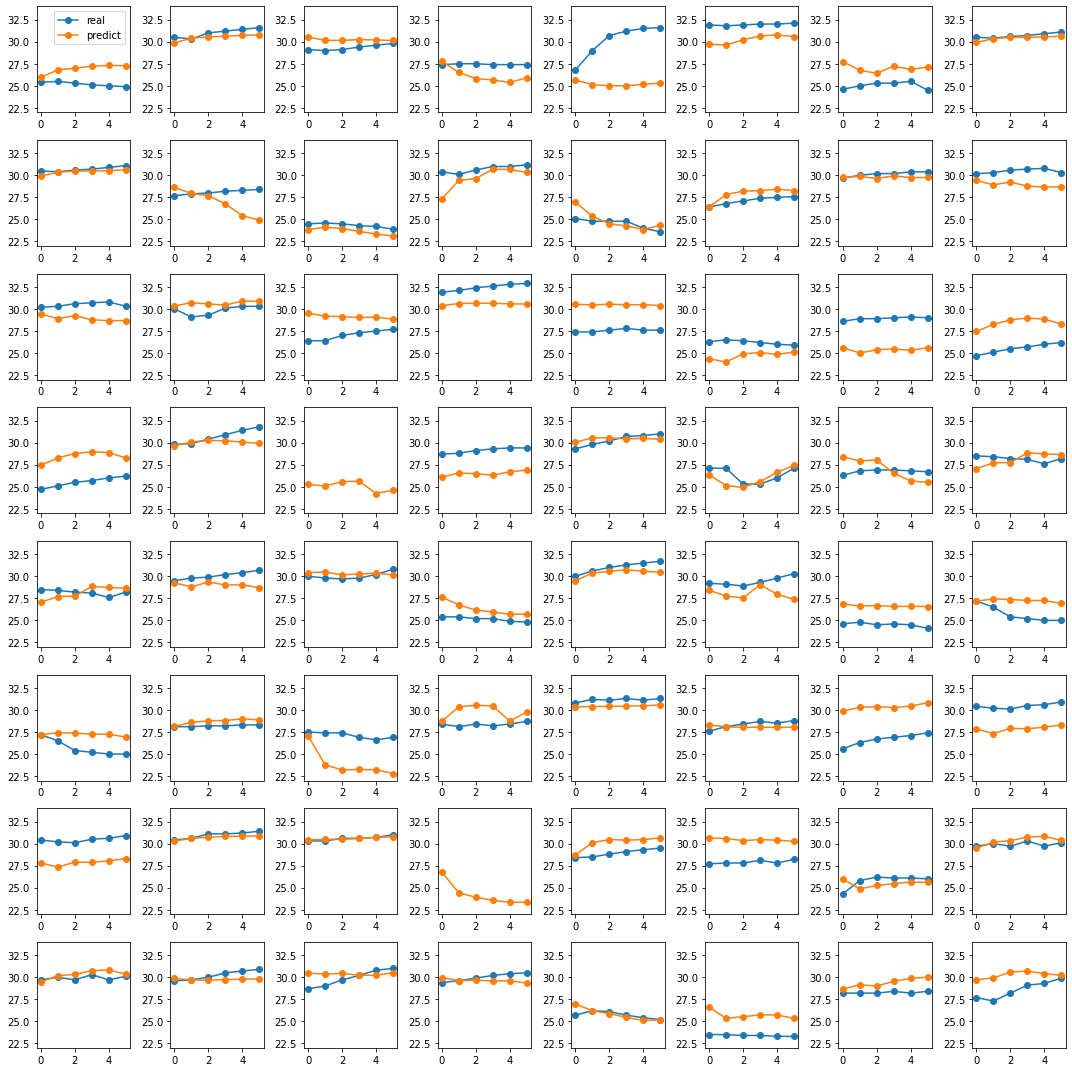

In [102]:
fig, axs = plt.subplots(figsize=(15,15), nrows = 8, ncols =8)
i=0
j=0
k=0
for i in range(0,8):
    for j, k in enumerate(range(k,k+8)):
        #print([i,j,k])
        axs[i,j].plot(test_y[k,:], label = 'real', marker='o')
        axs[i,j].plot(prediction[k,:], label = 'predict', marker='o')
        axs[i,j].set_ylim(22,34)
        axs[0,0].legend()
    fig.tight_layout()
plt.show()

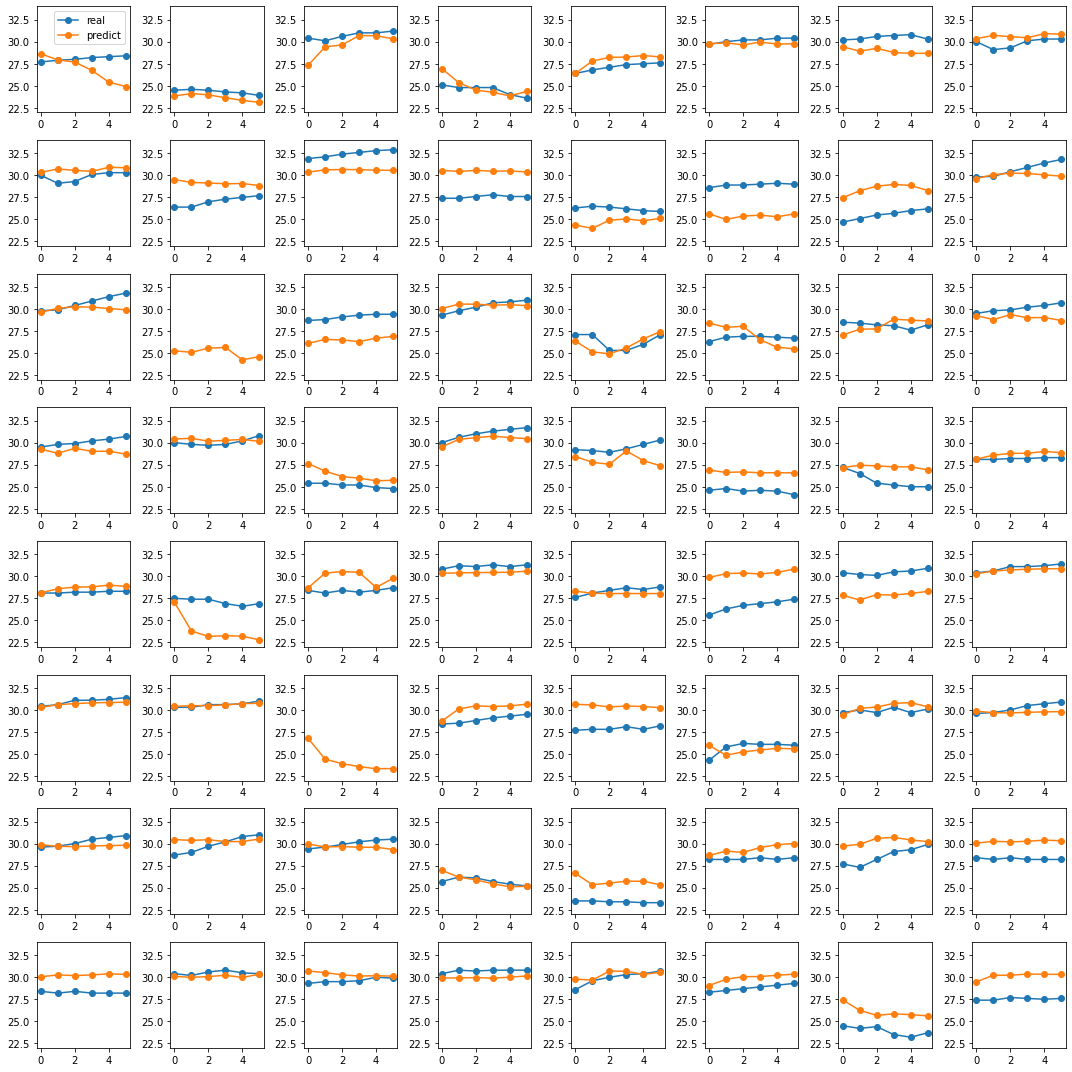

In [103]:
fig, axs = plt.subplots(figsize=(15,15), nrows = 8, ncols =8)
i=0
j=0
k=0
for i in range(0,8):
    for j, k in enumerate(range(k,k+8)):
        #print([i,j,k])
        axs[i,j].plot(test_y[k+8,:], label = 'real', marker='o')
        axs[i,j].plot(prediction[k+8,:], label = 'predict', marker='o')
        axs[i,j].set_ylim(22,34)
        axs[0,0].legend()
    fig.tight_layout()
plt.show()